In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import os

sns.set_style('white')
sns.set(font_scale=1.5)
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()
sc.settings.verbosity = 3


/projectnb/mccall/sbandya/.conda/envs/drpr_snrnaseq_gpu/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.0 anndata==0.10.6 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


In [2]:
## Set up I/O directories
basepath = Path("/projectnb/mccall/sbandyadka/drpr42d_snrnaseq/")
referencepath = basepath.joinpath('reference','FCA')
inputpath = basepath.joinpath('analysis','scarches')
outputpath = basepath.joinpath('analysis','cellcomposition')

In [3]:
head_predictions = sc.read(inputpath.joinpath("query_labeled.h5"))
head_antenna_predictions =  sc.read(inputpath.joinpath("query_labeled_head_antenna.h5"))

/projectnb/mccall/sbandya/.conda/envs/drpr_snrnaseq_gpu/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/projectnb/mccall/sbandya/.conda/envs/drpr_snrnaseq_gpu/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
compare_models = pd.concat([head_predictions.obs,head_antenna_predictions.obs],join="outer", axis=1)

In [5]:
hobs = head_predictions.obs
hobs['cells'] = hobs.index
haobs = head_antenna_predictions.obs
haobs['cells'] = haobs.index
compare_models = hobs.merge(haobs,suffixes=('_head', '_head_antenna'), on="cells")
compare_models.index = compare_models['cells']

In [6]:
w1118_42d_predictions = compare_models[compare_models['tissue_head']=="w1118_head"]
w1118_42d_predictions_broad = w1118_42d_predictions[['broad_annotation_head_antenna','broad_annotation_head']]
w1118_42d_predictions_broad

,broad_annotation_head_antenna,broad_annotation_head
cells,,
AAACCCAAGAGAGCAA-1,neuron,neuron
AAACCCAAGCCGGATA-1,unknown,unknown
AAACCCACATAATGCC-1,neuron,neuron
AAACCCATCAAGGCTT-1,neuron,neuron
AAACGAAAGGATACGC-1,unknown,unknown
...,...,...
TTTGTTGGTCGAACAG-1,neuron,unknown
TTTGTTGGTGATAGTA-1,unknown,neuron
TTTGTTGTCGAGTTGT-1,unknown,unknown


In [7]:
sns.set_style('white')
color_scheme = {"w1118_head": "dodgerblue","drprnull_head": "darkorange"}


/scratch/6735487.1.iris-gpu-pub/ipykernel_155115/1687178252.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=30,ha="right")
/scratch/6735487.1.iris-gpu-pub/ipykernel_155115/1687178252.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=30,ha="right")
/scratch/6735487.1.iris-gpu-pub/ipykernel_155115/1687178252.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=30,ha="right")
/scratch/6735487.1.iris-gpu-pub/ipykernel_155115/1687178252.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLo

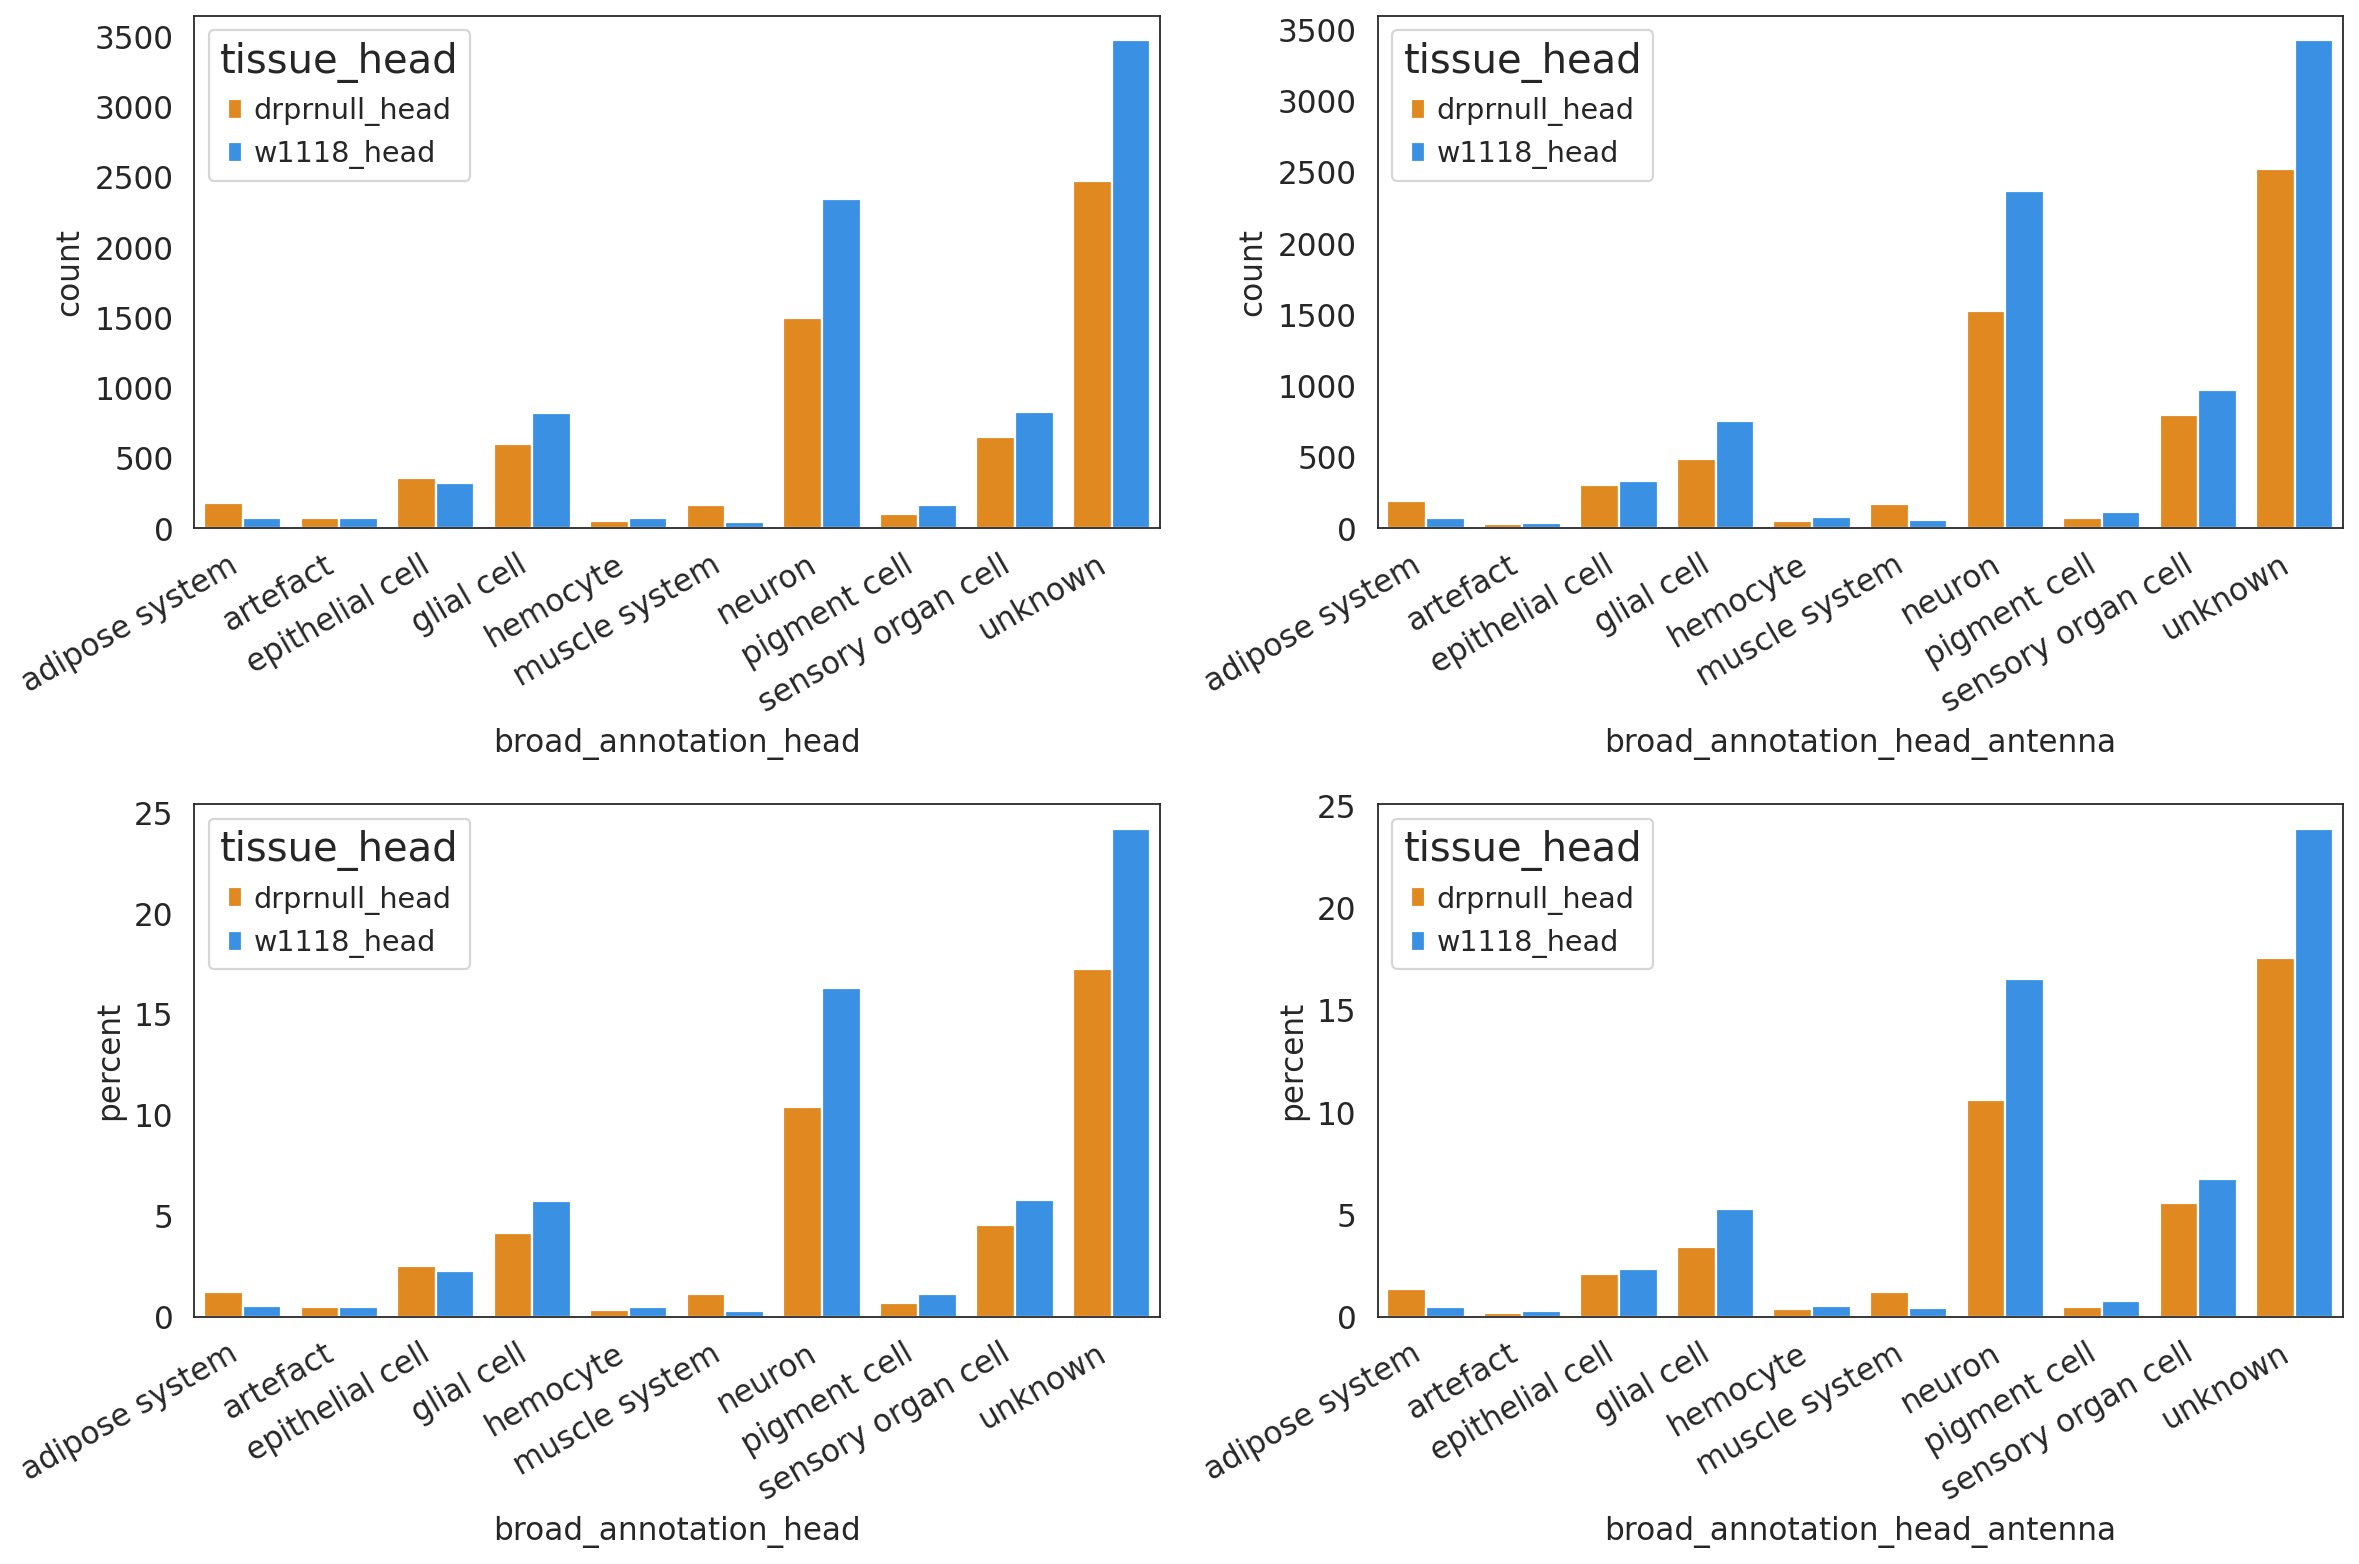

In [8]:
fig,ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(compare_models, x="broad_annotation_head",hue="tissue_head",ax=ax[0,0], palette=color_scheme)
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=30,ha="right")
sns.countplot(compare_models, x="broad_annotation_head_antenna",hue="tissue_head",ax=ax[0,1], palette=color_scheme)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=30,ha="right")
sns.countplot(compare_models, x="broad_annotation_head",hue="tissue_head",ax=ax[1,0], palette=color_scheme, stat="percent")
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=30,ha="right")
sns.countplot(compare_models, x="broad_annotation_head_antenna",hue="tissue_head",ax=ax[1,1], palette=color_scheme, stat="percent")
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=30,ha="right")

fig.tight_layout()

/scratch/6735487.1.iris-gpu-pub/ipykernel_155115/2764956468.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30,ha="right")
/scratch/6735487.1.iris-gpu-pub/ipykernel_155115/2764956468.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30,ha="right")


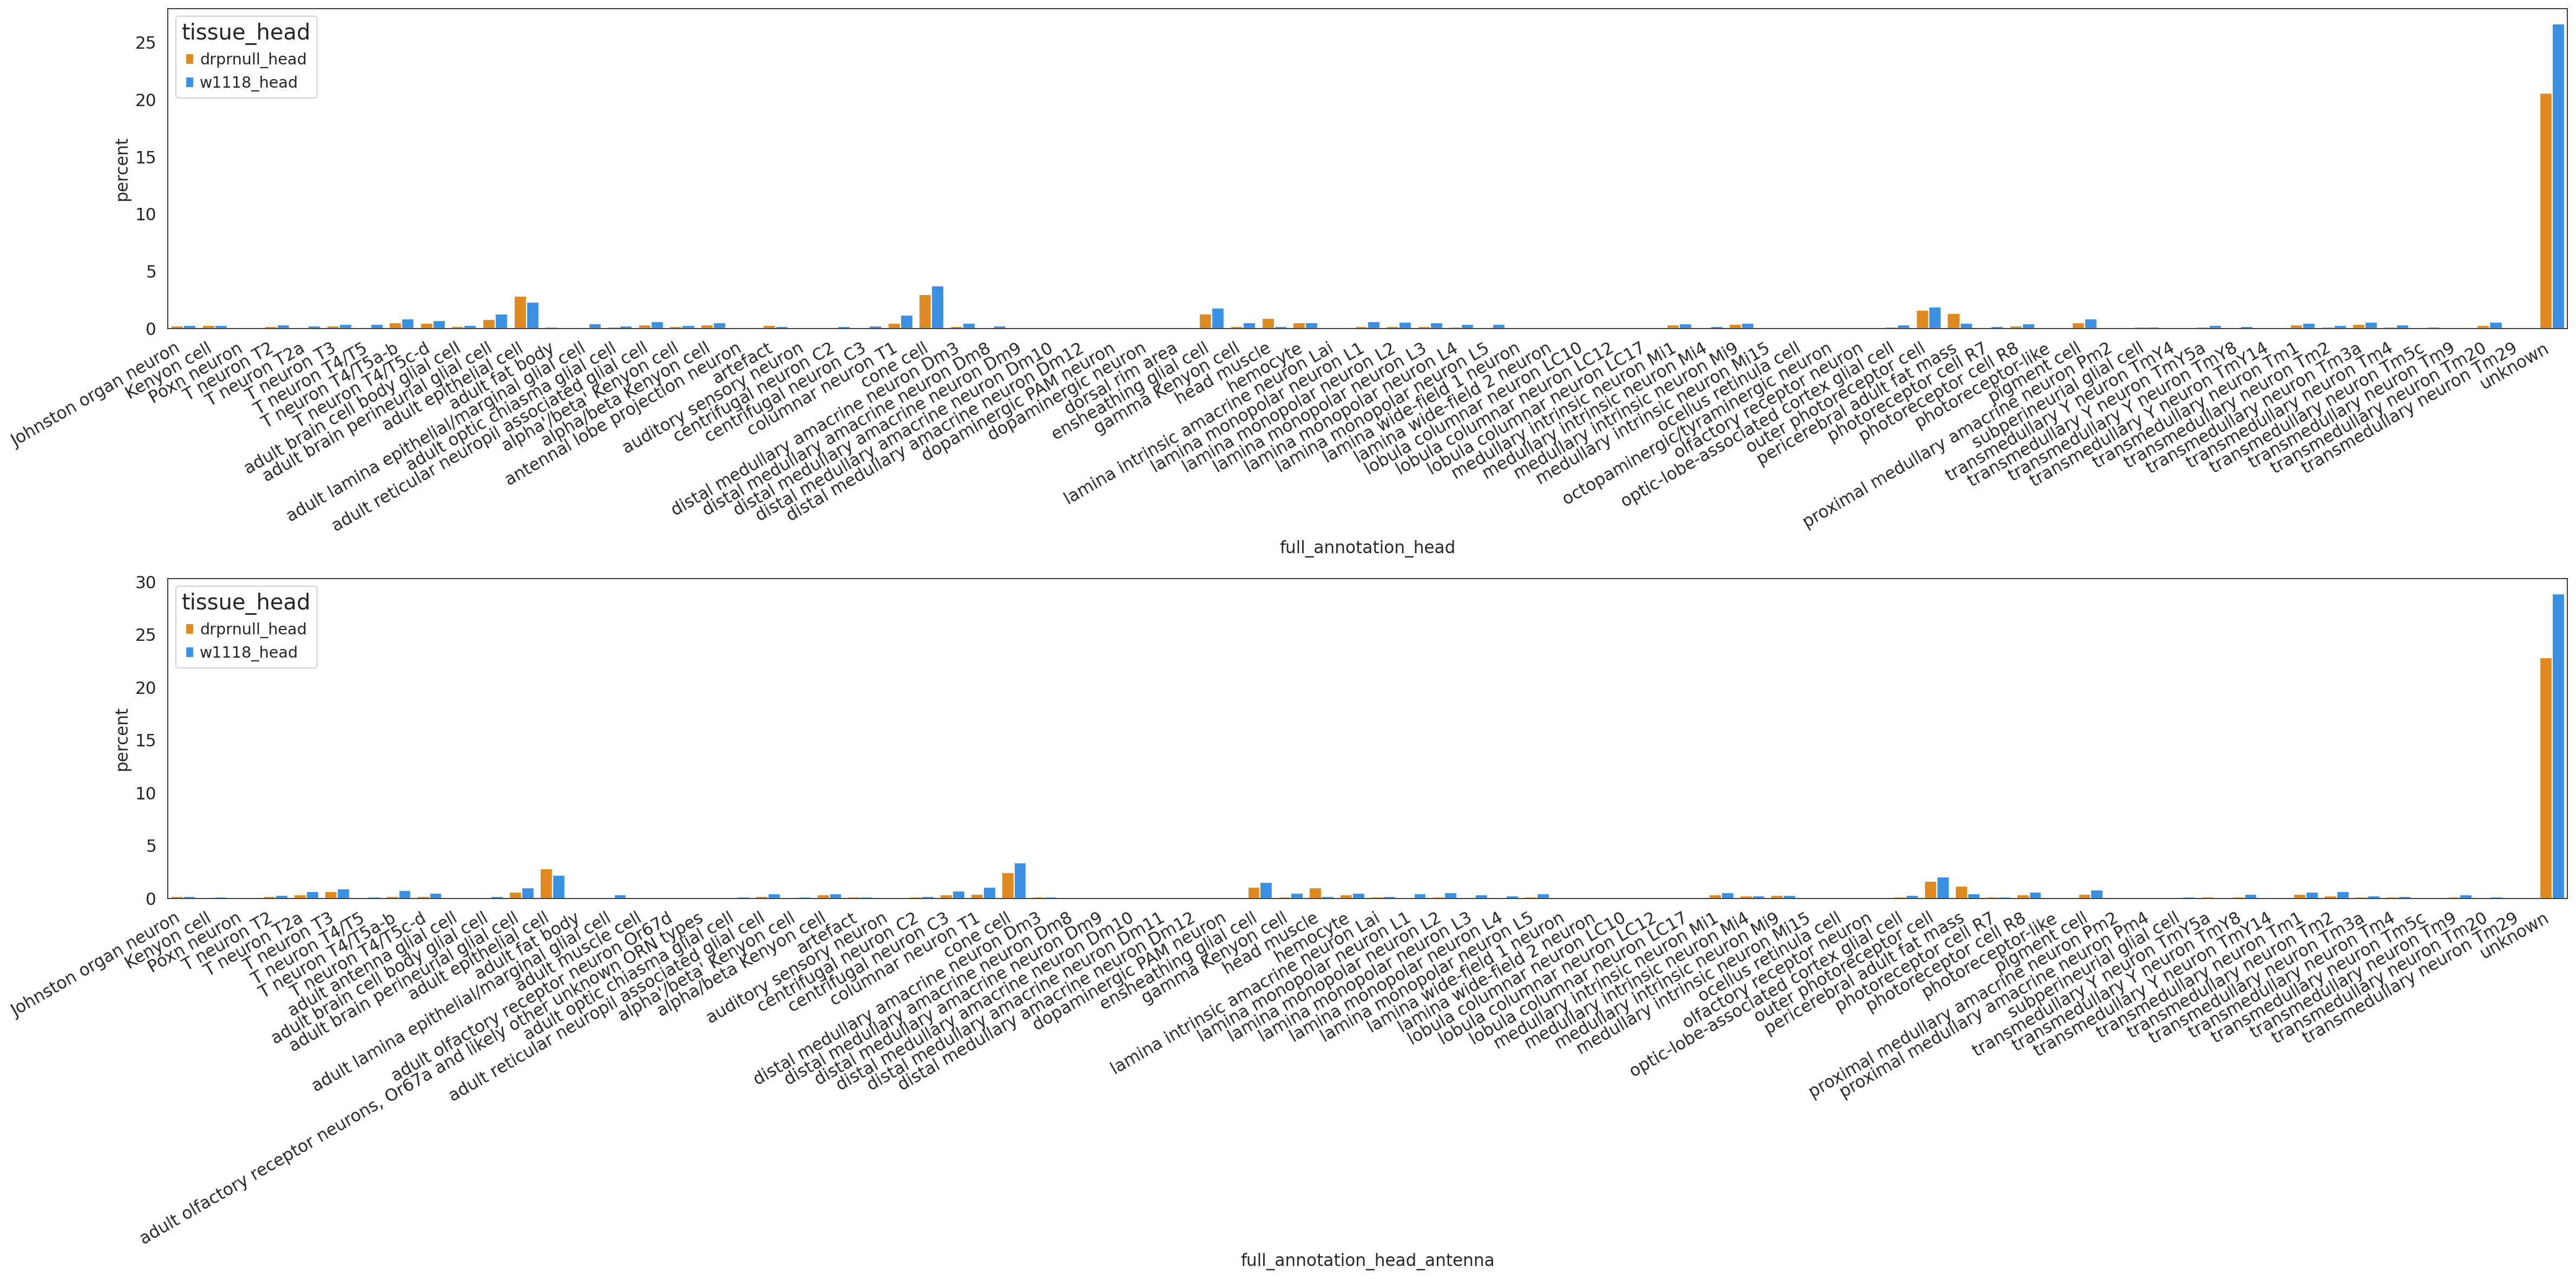

In [9]:
fig,ax = plt.subplots(2,1, figsize=(30,15))
sns.countplot(compare_models, x="full_annotation_head",hue="tissue_head",ax=ax[0], palette=color_scheme, stat="percent")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30,ha="right")
sns.countplot(compare_models, x="full_annotation_head_antenna",hue="tissue_head",ax=ax[1], palette=color_scheme, stat="percent")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30,ha="right")

fig.tight_layout()

In [14]:
print("annotations in head&antenna model not in head model: \n ", 
    set(compare_models['full_annotation_head_antenna']).difference(set(compare_models['full_annotation_head'])))
print("annotations in head not in head & antenna model: \n ", 
    set(compare_models['full_annotation_head']).difference(set(compare_models['full_annotation_head_antenna'])))


annotations in head&antenna model not in head model: 
  {'proximal medullary amacrine neuron Pm4', 'adult antenna glial cell', 'adult olfactory receptor neuron Or67d', 'adult olfactory receptor neurons, Or67a and likely other unknown ORN types', 'adult muscle cell', 'distal medullary amacrine neuron Dm11'}
annotations in head not in head & antenna model: 
  {'octopaminergic/tyraminergic neuron', 'transmedullary Y neuron TmY4', 'dorsal rim area', 'dopaminergic neuron', 'antennal lobe projection neuron'}
